# <center>Parkinson's Disease Detection</center>

* Parkinson's disease is a progressive disorder that affects the nervous system and the parts of the body controlled by the nerves.

### Importing Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Data Ingestion

In [2]:
df=pd.read_csv('Data/parkinsons.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
df["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [4]:
df = df.drop("name",axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
categorical_columns = []
numerical_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

In [8]:
print("Numerical Features: ",numerical_columns)

print("\nCategorical Features: ",categorical_columns)

Numerical Features:  ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

Categorical Features:  []


In [9]:
discrete_features=[feature for feature in numerical_columns if len(df[feature].unique())<25]
continuous_features=[feature for feature in numerical_columns if feature not in discrete_features]

## Data Pre-processing

### 1. Handling Missing Values

In [10]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Insights: No Missing Values

### 2. Handling Outliers

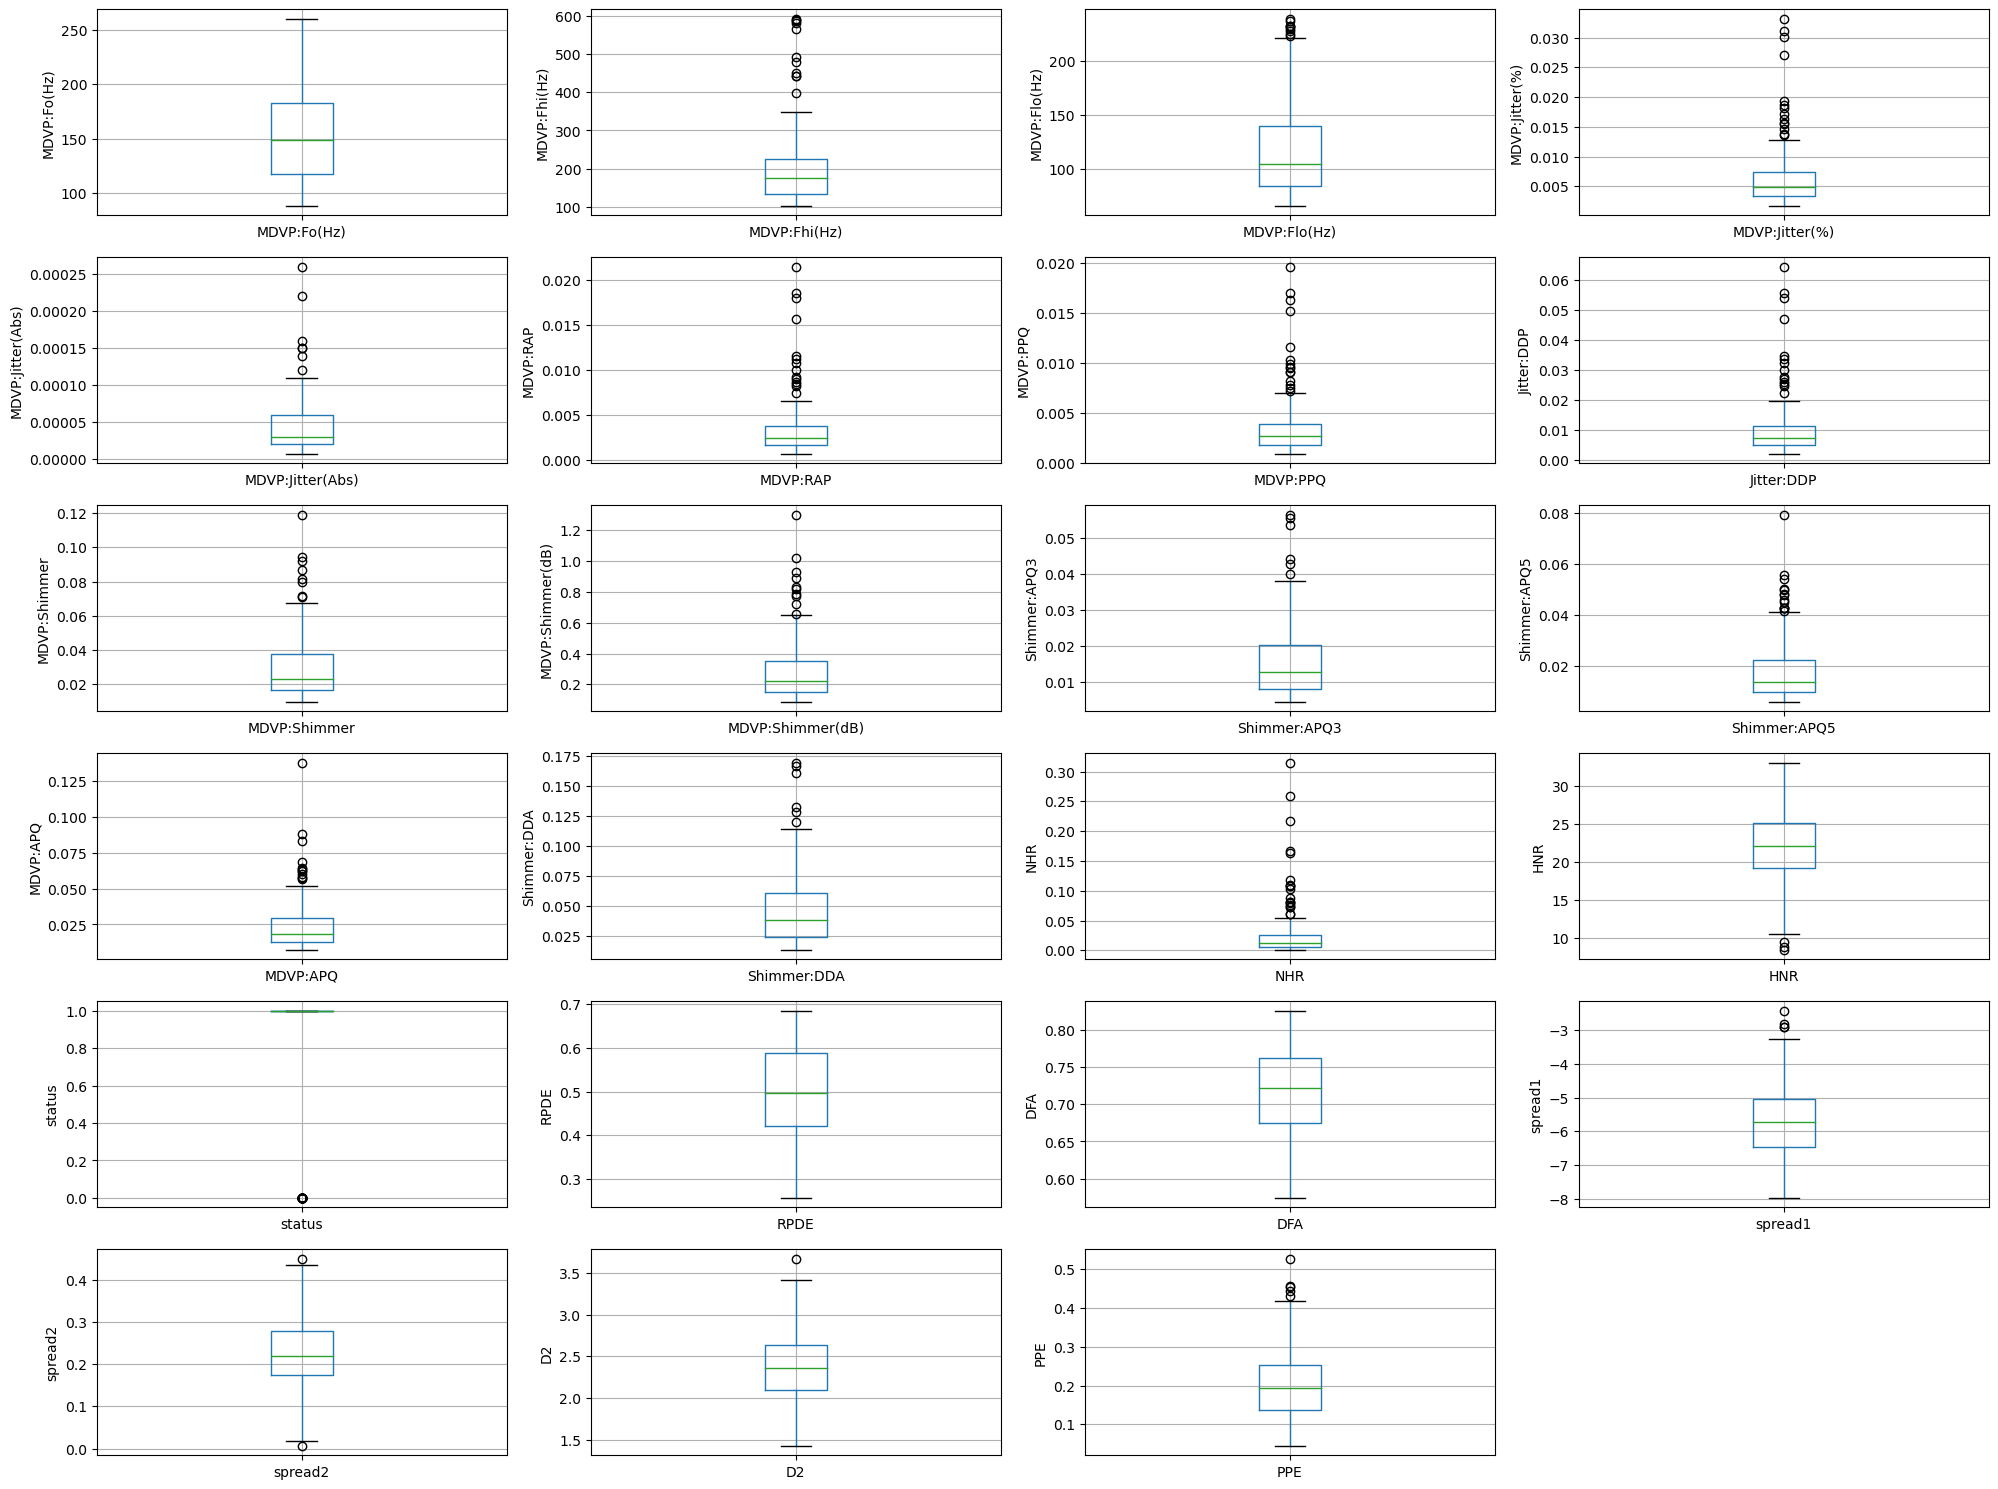

In [11]:
fig, axes = plt.subplots(6,4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    df.boxplot(column=col, ax=ax)
    ax.set_ylabel(col)

for j in range(len(df.columns), 6*4):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
for feature in continuous_features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_limit = df[feature].quantile(0.25) - (IQR * 3)
    upper_limit = df[feature].quantile(0.75) + (IQR * 3)
    df.loc[df[feature] >= upper_limit, feature] = upper_limit
    df.loc[df[feature] < lower_limit, feature] = lower_limit

In [13]:
x=df.drop(labels=['status'],axis=1)
y=df['status']

In [14]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.022110,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.019290,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.013090,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.013530,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.017670,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.027640,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.018100,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.084785,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.072230,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### Checking for Multi-Collinearity

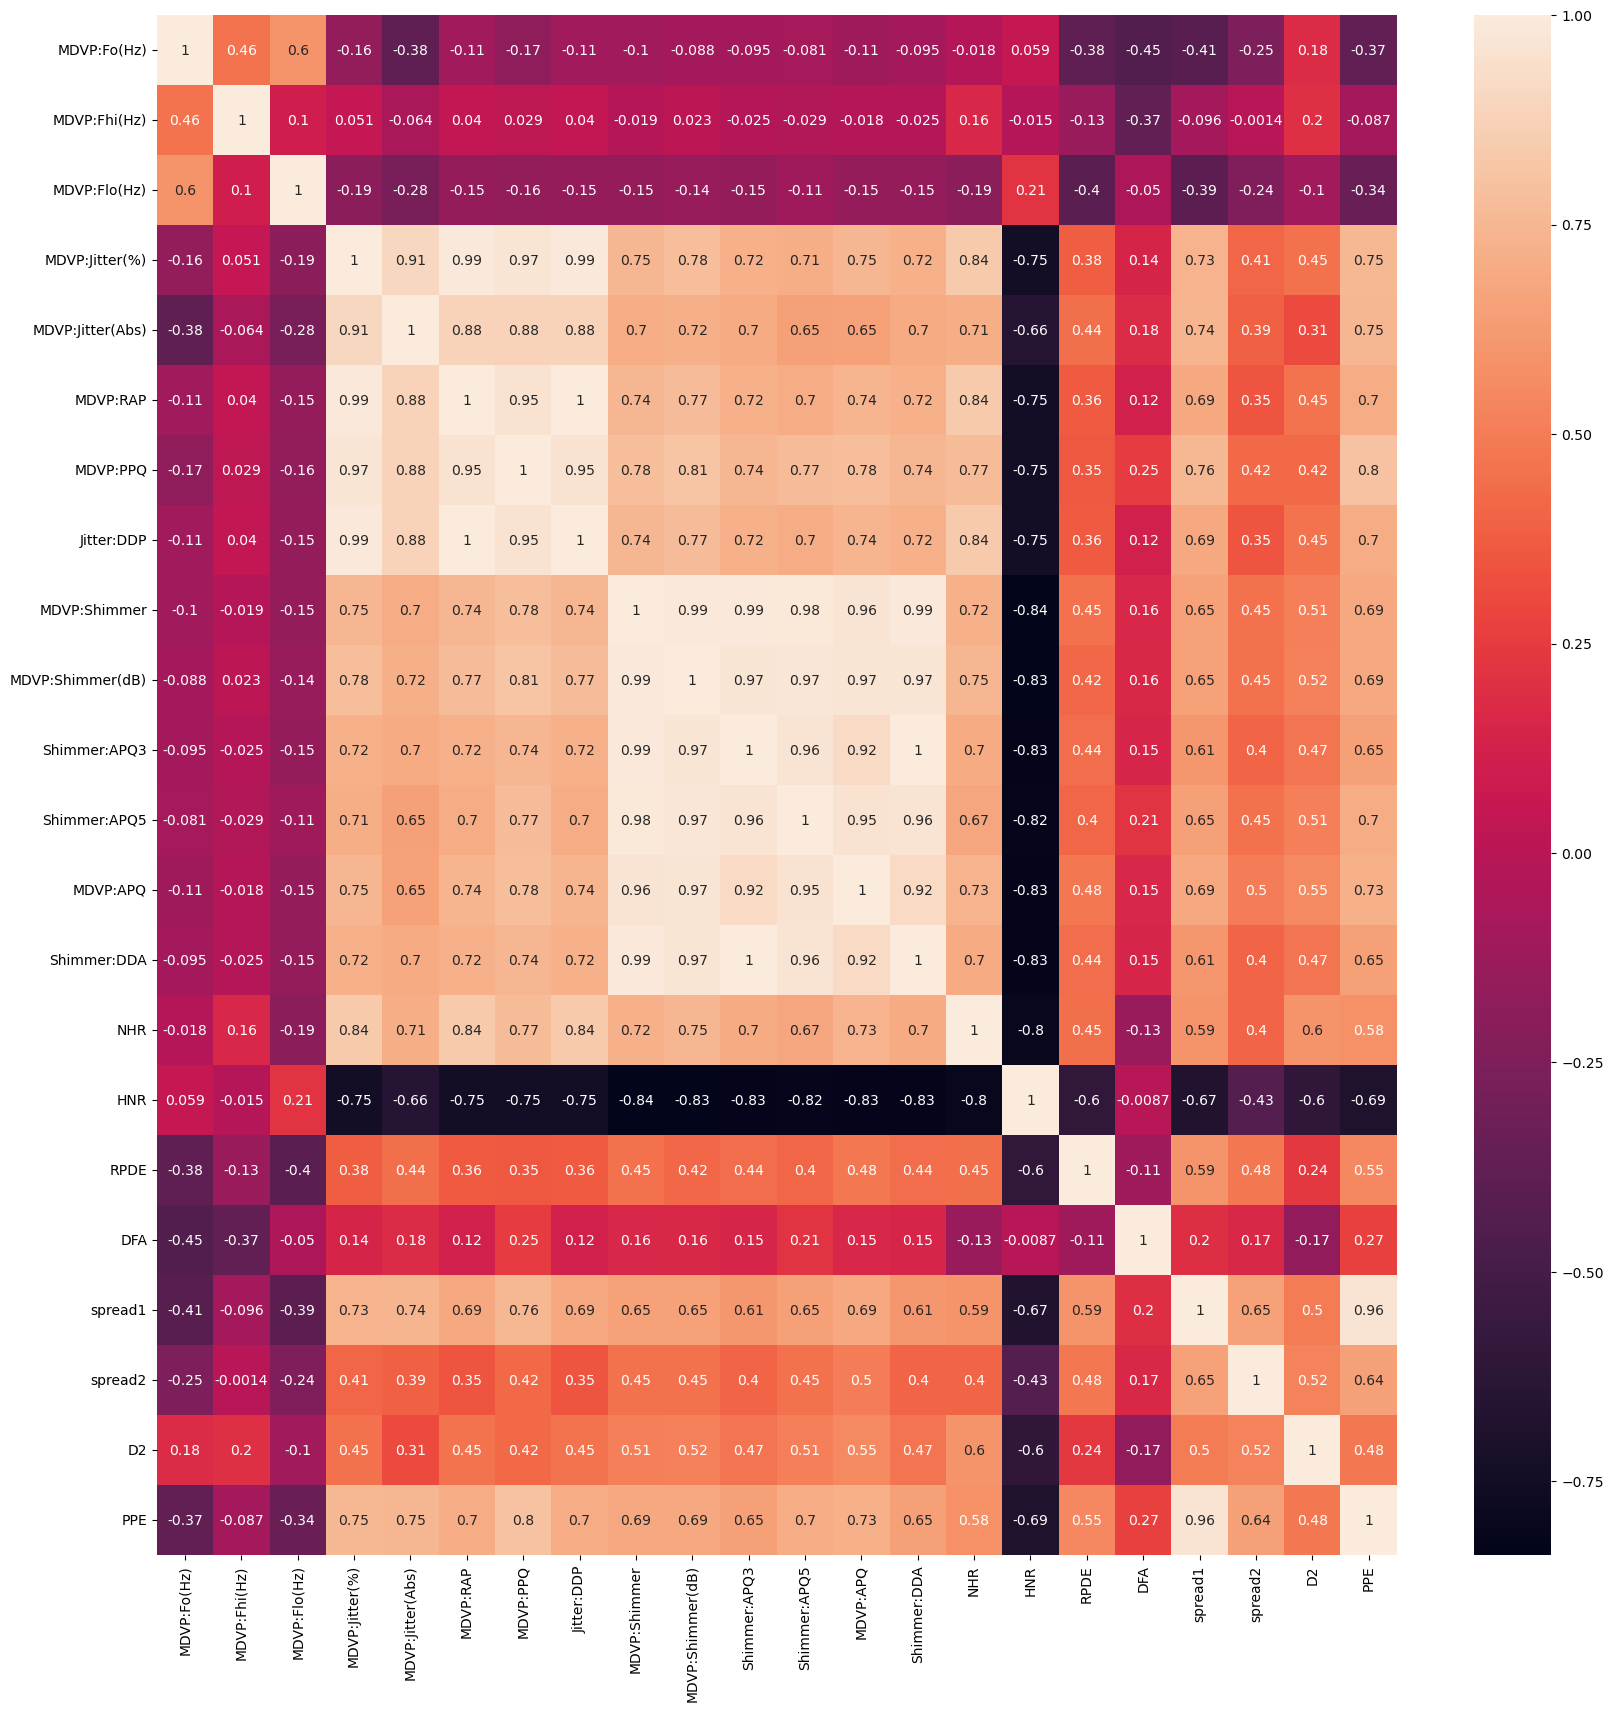

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(),annot=True)
plt.show()

In [16]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
corr_features=correlation(x,0.7)
print(corr_features)
len(set(corr_features))

{'MDVP:Jitter(Abs)', 'MDVP:Shimmer(dB)', 'NHR', 'HNR', 'Jitter:DDP', 'MDVP:APQ', 'MDVP:Shimmer', 'PPE', 'Shimmer:APQ3', 'MDVP:PPQ', 'Shimmer:APQ5', 'MDVP:RAP', 'Shimmer:DDA', 'spread1'}


14

In [18]:
x=x.drop(corr_features,axis=1)

In [19]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),RPDE,DFA,spread2,D2
0,119.992,157.302,74.997,0.00784,0.414783,0.815285,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.458359,0.819521,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.429895,0.825288,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.434969,0.819235,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.417356,0.823484,0.234513,2.332180
...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.448439,0.657899,0.121952,2.657476
191,209.516,253.017,89.488,0.00564,0.431674,0.683244,0.129303,2.784312
192,174.688,240.005,74.287,0.01360,0.407567,0.655683,0.158453,2.679772
193,198.764,396.961,74.904,0.00740,0.451221,0.643956,0.207454,2.138608


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
y.value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [22]:
y_train.value_counts()

status
1    118
0     38
Name: count, dtype: int64

## Modelling

In [23]:
models = {
    'LR': LogisticRegression(),
    'NB': GaussianNB(),
    'XGB': XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15, gamma=0.6, subsample=0.52, 
                              colsample_bytree=0.6, seed=27,reg_lambda=2, booster='dart', 
                              colsample_bylevel=0.6, colsample_bynode=0.5),
    'RF': RandomForestClassifier(),
    'GB': GradientBoostingClassifier(),
    'DT': DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6),
    'KNN': KNeighborsClassifier(),
    'EXT': ExtraTreesClassifier()
}

In [24]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for model_name, model in models.items():

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)

    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Testing Accuracy: ", test_accuracy)
    print("Precision: ",precision)
    print("Recall: ",recall)
    print("F1 Score: ",f1)


    model_list.append(model_name)
    accuracy_list.append(test_accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    print("=" * 35)

max_accuracy_index = accuracy_list.index(max(accuracy_list))
print(f"The best model based on accuracy is {model_list[max_accuracy_index]} with Testing Accuracy: {accuracy_list[max_accuracy_index]}")

Model: LR
Testing Accuracy:  0.8974358974358975
Precision:  0.8787878787878788
Recall:  1.0
F1 Score:  0.9354838709677419
Model: NB
Testing Accuracy:  0.8461538461538461
Precision:  0.896551724137931
Recall:  0.896551724137931
F1 Score:  0.896551724137931
Model: XGB
Testing Accuracy:  0.7435897435897436
Precision:  0.7435897435897436
Recall:  1.0
F1 Score:  0.8529411764705882
Model: RF
Testing Accuracy:  0.8974358974358975
Precision:  0.9629629629629629
Recall:  0.896551724137931
F1 Score:  0.9285714285714286
Model: GB
Testing Accuracy:  0.9487179487179487
Precision:  0.9354838709677419
Recall:  1.0
F1 Score:  0.9666666666666666
Model: DT
Testing Accuracy:  0.8461538461538461
Precision:  0.9259259259259259
Recall:  0.8620689655172413
F1 Score:  0.8928571428571429
Model: KNN
Testing Accuracy:  0.8717948717948718
Precision:  0.875
Recall:  0.9655172413793104
F1 Score:  0.9180327868852458
Model: EXT
Testing Accuracy:  0.9743589743589743
Precision:  0.9666666666666667
Recall:  1.0
F1 Score

In [25]:
best_model = models['RF']
pickle.dump(best_model,open('Parkinsons_Model.pkl','wb'))